## ASL Image Classification

##Setup Kaggle and Import Dataset




In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mutiharisp","key":"fe9ae67d439db844e587a3ef6f00c589"}'}

In [3]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download -d mrgeislinger/asl-rgb-depth-fingerspelling-spelling-it-out

100% 2.11G/2.11G [00:21<00:00, 90.5MB/s]
100% 2.11G/2.11G [00:21<00:00, 107MB/s] 


In [6]:
! unzip /content/asl-rgb-depth-fingerspelling-spelling-it-out.zip -d /input

Streaming output truncated to the last 5000 lines.
  inflating: /input/dataset5/E/u/color_20_0231.png  
  inflating: /input/dataset5/E/u/color_20_0232.png  
  inflating: /input/dataset5/E/u/color_20_0233.png  
  inflating: /input/dataset5/E/u/color_20_0234.png  
  inflating: /input/dataset5/E/u/color_20_0235.png  
  inflating: /input/dataset5/E/u/color_20_0236.png  
  inflating: /input/dataset5/E/u/color_20_0237.png  
  inflating: /input/dataset5/E/u/color_20_0238.png  
  inflating: /input/dataset5/E/u/color_20_0239.png  
  inflating: /input/dataset5/E/u/color_20_0240.png  
  inflating: /input/dataset5/E/u/color_20_0241.png  
  inflating: /input/dataset5/E/u/color_20_0242.png  
  inflating: /input/dataset5/E/u/color_20_0243.png  
  inflating: /input/dataset5/E/u/color_20_0244.png  
  inflating: /input/dataset5/E/u/color_20_0245.png  
  inflating: /input/dataset5/E/u/color_20_0246.png  
  inflating: /input/dataset5/E/u/color_20_0247.png  
  inflating: /input/dataset5/E/u/color_20_0248.p

## Import Environments

In [7]:
from tensorflow import keras
from keras import optimizers
from keras.callbacks import ReduceLROnPlateau
import os, pathlib, cv2
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt

In [8]:
print(os.listdir("../input"))

['dataset5']


## Combine Dataset

### Create New Directory to save all data from A,B,C,D,E

In [9]:
os.mkdir("/input/dataset5/all")

import string

for i in string.ascii_lowercase:
  if(i!="j" and i!="z"):
    new_folder = "/input/dataset5/all/"+i
    os.mkdir(new_folder)

### Rename Data in A,B,C,D,E

In [10]:
import shutil
import string

In [11]:
for i in string.ascii_lowercase:
  if(i!="j" and i!="z"):
    path = "/input/dataset5/A/"
    path = path +i
    os.chdir(path)
    files = os.listdir(path)
    for index, file in enumerate(files):
      os.rename(os.path.join(path, file), os.path.join(path, 'A'.join([str(file), '.png'])))

for i in string.ascii_lowercase:
  if(i!="j" and i!="z"):
    path = "/input/dataset5/B/"
    path = path +i
    os.chdir(path)
    files = os.listdir(path)
    for index, file in enumerate(files):
      os.rename(os.path.join(path, file), os.path.join(path, 'B'.join([str(file), '.png'])))

for i in string.ascii_lowercase:
  if(i!="j" and i!="z"):
    path = "/input/dataset5/C/"
    path = path +i
    os.chdir(path)
    files = os.listdir(path)
    for index, file in enumerate(files):
      os.rename(os.path.join(path, file), os.path.join(path, 'C'.join([str(file), '.png'])))

for i in string.ascii_lowercase:
  if(i!="j" and i!="z"):
    path = "/input/dataset5/D/"
    path = path +i
    os.chdir(path)
    files = os.listdir(path)
    for index, file in enumerate(files):
      os.rename(os.path.join(path, file), os.path.join(path, 'D'.join([str(file), '.png'])))

for i in string.ascii_lowercase:
  if(i!="j" and i!="z"):
    path = "/input/dataset5/E/"
    path = path +i
    os.chdir(path)
    files = os.listdir(path)
    for index, file in enumerate(files):
      os.rename(os.path.join(path, file), os.path.join(path, 'E'.join([str(file), '.png'])))

### Move A,B,C,D,E to all

In [12]:
for i in string.ascii_lowercase:
  if(i!="j" and i!="z"):
    src = '/input/dataset5/A/'
    trg = '/input/dataset5/all/'
    src = src+i
    trg = trg+i

    files=os.listdir(src)
    for fname in files:
      shutil.copy2(os.path.join(src,fname), trg)

for i in string.ascii_lowercase:
  if(i!="j" and i!="z"):
    src = '/input/dataset5/B/'
    trg = '/input/dataset5/all/'
    src = src+i
    trg = trg+i

    files=os.listdir(src)
    for fname in files:
      shutil.copy2(os.path.join(src,fname), trg)

for i in string.ascii_lowercase:
  if(i!="j" and i!="z"):
    src = '/input/dataset5/C/'
    trg = '/input/dataset5/all/'
    src = src+i
    trg = trg+i

    files=os.listdir(src)
    for fname in files:
      shutil.copy2(os.path.join(src,fname), trg)

for i in string.ascii_lowercase:
  if(i!="j" and i!="z"):
    src = '/input/dataset5/D/'
    trg = '/input/dataset5/all/'
    src = src+i
    trg = trg+i

    files=os.listdir(src)
    for fname in files:
      shutil.copy2(os.path.join(src,fname), trg)

for i in string.ascii_lowercase:
  if(i!="j" and i!="z"):
    src = '/input/dataset5/E/'
    trg = '/input/dataset5/all/'
    src = src+i
    trg = trg+i

    files=os.listdir(src)
    for fname in files:
      shutil.copy2(os.path.join(src,fname), trg)

## Create Train and Test Split with ImageDataGenerator

In [13]:
data_dir = os.path.abspath('/input/dataset5/all')

In [14]:
IMAGE_SHAPE = (64, 64)
TRAINING_DATA_DIR = data_dir

datagen_kwargs = dict(rescale=1./255, validation_split=.20)
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
valid_generator = valid_datagen.flow_from_directory(
    TRAINING_DATA_DIR, 
    subset="validation", 
    shuffle=True,
    target_size=IMAGE_SHAPE
)

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
train_generator = train_datagen.flow_from_directory(
    TRAINING_DATA_DIR, 
    subset="training", 
    shuffle=True,
    target_size=IMAGE_SHAPE)

Found 26325 images belonging to 24 classes.
Found 105343 images belonging to 24 classes.


In [15]:
# Learn more about data batches

image_batch_train, label_batch_train = next(iter(train_generator))
print("Image batch shape: ", image_batch_train.shape)
print("Label batch shape: ", label_batch_train.shape)

Image batch shape:  (32, 64, 64, 3)
Label batch shape:  (32, 24)


In [16]:
# Learn about dataset labels

dataset_labels = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S'
 'T' 'U' 'V' 'W' 'X' 'Y']





























## Model

In [17]:
os.chdir("/content")

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,  MaxPooling2D,  Activation, Dense, Flatten, Dropout


model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = (64,64,3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(24, activation = 'softmax'))

In [19]:
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 30, 30, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        36928     
                                                        

In [20]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=0,factor=0.5, min_lr=0.00001)

steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
val_steps_per_epoch = np.ceil(valid_generator.samples/valid_generator.batch_size)

from datetime import datetime 
batch_size=16
start1 = datetime.now() 
history = model.fit(train_generator, 
                    steps_per_epoch=steps_per_epoch,
                    batch_size = 128,
                    epochs = 10, 
                    validation_data = valid_generator, 
                    validation_steps=val_steps_per_epoch,
                    callbacks = [learning_rate_reduction])

stop1 = datetime.now()
#Execution time of the model 
execution_time = stop1-start1
print("Execution time is: ", execution_time)

Epoch 1/10
3292/3292 [==============================] - 180s 51ms/step - loss: 0.7204 - accuracy: 0.7794 - val_loss: 0.5503 - val_accuracy: 0.8496 - lr: 0.0010
Epoch 2/10
3292/3292 [==============================] - 154s 47ms/step - loss: 0.2657 - accuracy: 0.9145 - val_loss: 0.5200 - val_accuracy: 0.8861 - lr: 0.0010
Epoch 3/10
3292/3292 [==============================] - 122s 37ms/step - loss: 0.1842 - accuracy: 0.9390 - val_loss: 0.5562 - val_accuracy: 0.8871 - lr: 0.0010
Epoch 4/10
3292/3292 [==============================] - 119s 36ms/step - loss: 0.1434 - accuracy: 0.9516 - val_loss: 0.5825 - val_accuracy: 0.8922 - lr: 0.0010
Epoch 5/10
3292/3292 [==============================] - 121s 37ms/step - loss: 0.1180 - accuracy: 0.9603 - val_loss: 0.5847 - val_accuracy: 0.8951 - lr: 0.0010
Epoch 6/10
3292/3292 [==============================] - 119s 36ms/step - loss: 0.1002 - accuracy: 0.9657 - val_loss: 0.4833 - val_accuracy: 0.9042 - lr: 0.0010
Epoch 7/10
3292/3292 [==================

## Evaluate model on test set (GENERATOR VERSION)

In [39]:
final_loss, final_accuracy = model.evaluate(valid_generator)

823/823 [==============================] - 25s 31ms/step - loss: 0.6670 - accuracy: 0.8986


In [42]:
print("Final accuracy: {:.2f}%".format(final_accuracy * 100))

Final accuracy: 89.86%


## Save and Load the model

In [23]:
ASL_SAVED_MODEL = "saved_models/asl1"
tf.saved_model.save(model, ASL_SAVED_MODEL)

INFO:tensorflow:Assets written to: saved_models/asl1/assets


In [24]:
# Load the SavedModel

asl_model = hub.load(ASL_SAVED_MODEL)
print(asl_model)

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f7c3b6621d0>


In [25]:
# Get images and labels batch from validation dataset generator

val_image_batch, val_label_batch = next(iter(valid_generator))
true_label_ids = np.argmax(val_label_batch, axis=-1)

print("Validation batch shape:", val_image_batch.shape)

Validation batch shape: (32, 64, 64, 3)


In [26]:
tf_model_predictions = asl_model(val_image_batch)
print("Prediction results shape:", tf_model_predictions.shape)

Prediction results shape: (32, 24)


In [27]:
# Convert prediction results to Pandas dataframe, for better visualization

tf_pred_dataframe = pd.DataFrame(tf_model_predictions.numpy())
tf_pred_dataframe.columns = dataset_labels

print("Prediction results for the first elements")
tf_pred_dataframe.head()

Prediction results for the first elements


,A,B,C,D,E,F,G,H,I,K,...,P,Q,R,S,T,U,V,W,X,Y
0,1.166968e-20,1.000000e+00,1.580404e-21,1.434360e-20,1.072017e-15,1.965247e-10,1.608340e-19,1.245582e-25,1.370461e-23,2.216789e-20,...,1.666570e-18,1.639024e-25,4.061718e-14,6.587824e-23,1.655379e-19,3.228715e-12,7.003146e-19,1.845323e-14,1.421737e-22,4.449715e-22
1,2.774688e-12,3.718902e-13,3.383057e-10,2.449552e-07,7.750726e-01,3.389383e-12,1.085231e-11,1.322687e-11,2.481304e-09,3.329319e-13,...,8.246343e-12,1.527174e-07,1.788608e-13,2.106761e-08,7.644798e-04,2.802161e-17,9.890834e-20,2.027531e-21,6.646613e-09,6.186462e-11
2,6.061175e-16,2.730449e-08,1.712306e-19,5.455103e-06,4.064255e-08,8.713358e-15,1.449111e-11,1.765470e-17,8.244153e-11,1.128583e-08,...,2.317661e-04,1.952800e-13,5.465302e-04,1.686249e-18,2.502932e-22,2.549142e-10,1.209871e-07,7.371089e-08,9.992158e-01,1.319455e-07
3,2.281199e-17,2.682857e-19,5.922925e-15,2.631452e-12,6.520883e-09,9.193599e-10,1.039878e-11,3.829265e-16,9.994346e-01,3.979712e-15,...,2.210610e-09,8.760016e-11,5.019347e-14,1.705313e-10,2.421650e-09,5.342996e-18,4.340048e-18,7.549249e-17,1.762579e-10,5.652806e-04
4,9.995536e-01,2.254299e-16,6.919666e-16,7.084255e-10,9.124653e-14,5.246700e-13,7.706734e-16,1.253383e-21,1.326954e-15,2.784886e-17,...,3.531052e-05,1.565576e-15,2.190890e-10,2.136538e-13,4.102361e-04,4.844857e-10,2.611430e-19,4.174936e-13,3.221896e-10,4.404480e-11


In [28]:
predicted_ids = np.argmax(tf_model_predictions, axis=-1)
predicted_labels = dataset_labels[predicted_ids]

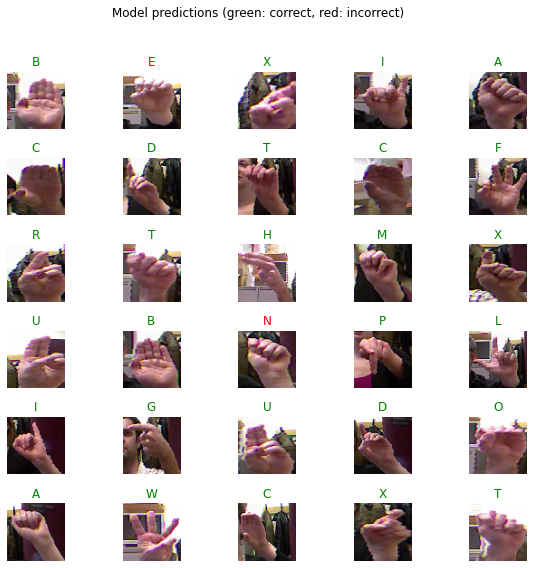

In [29]:
# Print images batch and labels predictions

plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(val_image_batch[n])
  color = "green" if predicted_ids[n] == true_label_ids[n] else "red"
  plt.title(predicted_labels[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")

## Convert Model to TFLite

In [30]:
!mkdir "tflite_models"
TFLITE_MODEL = "tflite_models/asl.tflite"
TFLITE_QUANT_MODEL = "tflite_models/asl_quant.tflite"

In [31]:
# Get the concrete function from the Keras model.
run_model = tf.function(lambda x : asl_model(x))

# Save the concrete function.
concrete_func = run_model.get_concrete_function(
    tf.TensorSpec(model.inputs[0].shape, model.inputs[0].dtype)
)

# Convert the model
converter = tf.lite.TFLiteConverter.from_concrete_functions([concrete_func])
converted_tflite_model = converter.convert()
open(TFLITE_MODEL, "wb").write(converted_tflite_model)

# Convert the model to quantized version with post-training quantization
converter = tf.lite.TFLiteConverter.from_concrete_functions([concrete_func])
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_quant_model = converter.convert()
open(TFLITE_QUANT_MODEL, "wb").write(tflite_quant_model)

print("TFLite models and their sizes:")
!ls "tflite_models" -lh

TFLite models and their sizes:
total 7.0M
-rw-r--r-- 1 root root 1.4M Jun 12 14:07 asl_quant.tflite
-rw-r--r-- 1 root root 5.6M Jun 12 14:07 asl.tflite


In [33]:
# import tensorflow as tf

# interpreter = tf.lite.Interpreter(model_path="/input/dataset5/E/y/tflite_models/asl_quant.tflite")
# interpreter.allocate_tensors()

# # Print input shape and type
# inputs = interpreter.get_input_details()
# print('{} input(s):'.format(len(inputs)))
# for i in range(0, len(inputs)):
#     print('{} {}'.format(inputs[i]['shape'], inputs[i]['dtype']))

# # Print output shape and type
# outputs = interpreter.get_output_details()
# print('\n{} output(s):'.format(len(outputs)))
# for i in range(0, len(outputs)):
#     print('{} {}'.format(outputs[i]['shape'], outputs[i]['dtype']))

## Test with Custom Images

In [43]:
os.chdir("/content")
from google.colab import files
uploaded = files.upload()

Saving color_24_0003.png to color_24_0003.png


In [44]:
from tensorflow.keras.preprocessing import image
def getPrediction(path):
    img = image.load_img(path, target_size=(64,64))
    imgplot = plt.imshow(img)

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    predicted = model.predict(images).squeeze()
    print(dataset_labels[np.argmax(predicted)])

Y


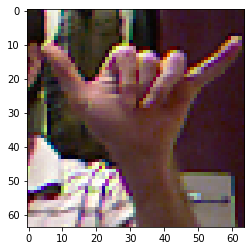

In [46]:
getPrediction("color_24_0003.png")

END!